# Machine-learning models for $\lambda$ and $\omega_{\rm log}$
#### Huan Tran, Georgia Institute of Technology, huan.tran@mse.gatech.edu, https://huantd.github.io/

This notebook is a part of [Huan Tran & Tuoc N. Vu, *Machine-learning approach for discovery of conventional superconductors*, published in Phys. Rev. Materials **7**, 054805 (2023)], and is also an example of matsML toolkit. Results obtained here can be found in this work.

This notebook prodives two featurized datasets of $\lambda$ and $\omega_{\rm log}$ and the scripts to train some machine-learning (ML) models reported in the Reference above. $\lambda$ and $\omega_{\rm log}$ are two important parameters characterizing the electron-phonon interactions that can be used to compute the critical temperature $T_{\rm c}$ of a superconducting material in some simple ways, one of which is the McMillan equation [W. L. McMillan, Phys. Rev. **167**, 331 (1968)]. 

The raw datasets used for [Huan Tran & Tuoc N. Vu, *Machine-learning approach for discovery of conventional superconductors*] and in this notebook were curated from the scientific literature. They contains the materials atomic structures from which $\lambda$ and $\omega_{\rm log}$ were computed using DFPT and reported, mostly in the 2010s and 2020s. Two fearurized datasets (data_lambda.csv and data_omlog.csv) that are provided here were prepared using Matminer and some feature engineering techniques. 

In [1]:
import os
import pandas as pd

### Lambda data and training models 

In [2]:
data_file = "data_lambda.csv"
id_col = ['ind']                    # this is id column in the fingerprint data
y_cols = ['Lambda']                 # this is y columns
comment_cols = []                   # other columns that are not id, not x, nor y columns
n_trains = 1.00                     # 100% for training, 0% for validating
sampling = 'random'                 # way of train/test spliting. Random, stratified
x_scaling = 'minmax'
y_scaling = 'logpos'

data_params = {'data_file': data_file, 'id_col':id_col, 'y_cols':y_cols, 
               'comment_cols': comment_cols, 'y_scaling': y_scaling, 
               'x_scaling': x_scaling, 'sampling': sampling, 'n_trains': n_trains}

  matsML, v1.3.0
  *****
  
  Checking parameters
    all passed                   True
 
  Learning fingerprinted/featured data
    algorithm                    gaussian process regression w/ scikit-learn
    kernel                       Matern
    nfold_cv                     5
    optimizer                    fmin_l_bfgs_b
    n_restarts_optimizer         0
    noise_lb                     0.03
    noise_ub                     100
    rmse_cv                      False
  Read data
    data file                    data_lambda.csv
    data size                    584
    training size                100.0  %
    test size                    0.0  %
    x dimensionality             40
    y dimensionality             1
    y label(s)                   ['Lambda']
  Scaling x                      minmax
    xscaler saved in             xscaler.pkl
  Scaling y                      logpos
  Prepare train/test sets        random
  Training model w/ cross validation
    cv,rmse_train,rmse_tes

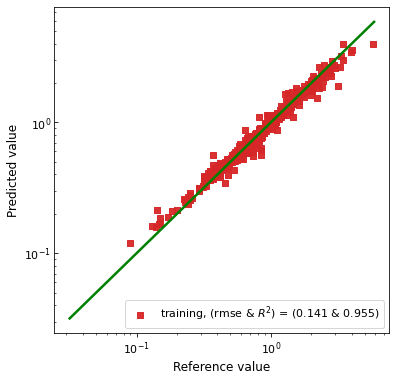

In [3]:
from matsml.models import GPR

nfold_cv = 5                     # Number of folds for cross validation
model_file = 'model_gpr.pkl'     # Name of the model file to be created
verbosity = 0
rmse_cv = False
n_restarts_optimizer = 0
kernel = 'Matern'                # RBF, DotProduct, Matern
noise_lb = 0.0300
noise_ub = 100

model_params = {'nfold_cv': nfold_cv,'model_file': model_file,'verbosity': verbosity, 
              'n_restarts_optimizer': n_restarts_optimizer, 'rmse_cv': rmse_cv, 
              'kernel': kernel, 'noise_lb': noise_lb, 'noise_ub': noise_ub}

model = GPR(data_params = data_params, model_params = model_params)
model.train()
model.plot(pdf_output = False)


### Omlog data and model training

In [4]:
data_file = 'data_omlog.csv'
id_col = ['ind']                    # this is id column in the fingerprint data
y_cols = ['omlog']                  # this is y columns
comment_cols = []                   # other columns that are not id, not x, nor y columns

n_trains = 1.0                      # 100% for training, 0% for validating
sampling = 'random'                 # way of train/test spliting. Random, stratified
x_scaling = 'minmax'
y_scaling = 'minmax'

data_params = {'data_file': data_file, 'id_col': id_col,'y_cols': y_cols,
               'comment_cols': comment_cols,'y_scaling': y_scaling,
               'x_scaling': x_scaling, 'sampling': sampling, 'n_trains': n_trains}

  
  Checking parameters
    all passed                   True
 
  Learning fingerprinted/featured data
    algorithm                    gaussian process regression w/ scikit-learn
    kernel                       Matern
    nfold_cv                     5
    optimizer                    fmin_l_bfgs_b
    n_restarts_optimizer         3
    noise_lb                     0.025
    noise_ub                     100
    rmse_cv                      False
  Read data
    data file                    data_omlog.csv
    data size                    567
    training size                100.0  %
    test size                    0.0  %
    x dimensionality             38
    y dimensionality             1
    y label(s)                   ['omlog']
  Scaling x                      minmax
    xscaler saved in             xscaler.pkl
  Scaling y                      minmax
  Prepare train/test sets        random
  Training model w/ cross validation
    cv,rmse_train,rmse_test,rmse_opt: 0 0.047682 0.0

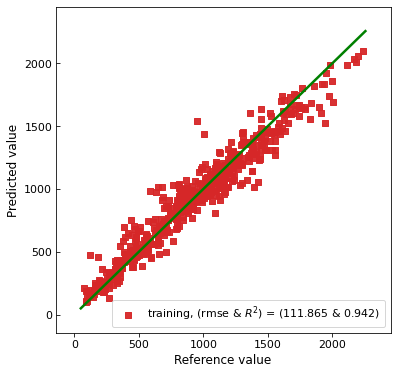

In [5]:
from matsml.models import GPR

# Model parameters
nfold_cv = 5                     # Number of folds for cross validation
model_file = 'model_gpr.pkl'     # Name of the model file to be created
verbosity = 0
rmse_cv = False
n_restarts_optimizer = 3
kernel = 'Matern'                # RBF, DotProduct, Matern
noise_lb = 0.0250
noise_ub = 100

model_params = {'nfold_cv': nfold_cv, 'model_file': model_file, 'verbosity': verbosity,
              'n_restarts_optimizer': n_restarts_optimizer, 'rmse_cv': rmse_cv,
              'kernel': kernel, 'noise_lb': noise_lb, 'noise_ub': noise_ub}

model = GPR(data_params = data_params, model_params = model_params)
model.train()
model.plot(pdf_output=False)
